In [2]:
from sys import path
from pathlib import Path
path.append(str(Path.cwd().parent))

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import open3d as o3d
from data.image import CS_Images
import SimpleITK as sitk
import nibabel as nb

In [4]:
def plot_sulci_mesh(caseid, sulci='all'):
    idx = dataset.get_caseidx(caseid)[0][0]
    data = dataset[idx]
    lslc = data['bvisa_mesh_lscl']
    rslc = data['bvisa_mesh_rscl']
    lslc.compute_triangle_normals()
    rslc.compute_triangle_normals()
    if sulci == 'l':
        o3d.visualization.draw_geometries([lslc])
    elif sulci == 'r':
        o3d.visualization.draw_geometries([rslc])
    else:
        o3d.visualization.draw_geometries([lslc, rslc])
        

# Sulci Mesh

## Load and plot

In [5]:
mesh_df = pd.read_pickle('/mrhome/vladyslavz/git/central-sulcus-analysis/results/CS_shape_analysis_bvisa.pkl')
mesh_df.columns

Index(['caseid', 'centre', 'bvisaL_cluster_connected_triangles',
       'bvisaL_triangl_per_clust', 'bvisaL_srf_are_per_clust',
       'bvisaL_total_srf_area', 'bvisaL_is_self_intersecting',
       'bvisaL_is_watertight', 'bvisaL_is_edge_manifold',
       'bvisaL_is_vertex_manifold', 'bvisaL_total_volume',
       'bvisaL_holes_filled_volume', 'bvisaR_cluster_connected_triangles',
       'bvisaR_triangl_per_clust', 'bvisaR_srf_are_per_clust',
       'bvisaR_total_srf_area', 'bvisaR_is_self_intersecting',
       'bvisaR_is_watertight', 'bvisaR_is_edge_manifold',
       'bvisaR_is_vertex_manifold', 'bvisaR_total_volume',
       'bvisaR_holes_filled_volume', 'LCS_lebel2inters', 'RCS_lebel2inters'],
      dtype='object')

In [6]:
# mu = mesh_df['bvisaL_holes_filled_volume'].mean()
# sigma = mesh_df['bvisaL_holes_filled_volume'].std()
# sigma3plus = mu + 3 * sigma
# sigma3minus = mu - 3 * sigma
# max_val = mesh_df['bvisaL_holes_filled_volume'].max()
# ax = sns.histplot(mesh_df, x='bvisaR_holes_filled_volume', hue='centre', bins=50, kde=True, fill=True, common_norm=False)
# plt.vlines(sigma3plus, ax.get_ylim()[0], ax.get_ylim()[1], colors='r', linestyles='dashed', label='3$\sigma$')
# plt.text(sigma3plus + 1, 5,f'+3$\sigma$\n{sigma3plus:.2f}', color='r')
# plt.vlines(sigma3minus, ax.get_ylim()[0], ax.get_ylim()[1], colors='r', linestyles='dashed', label='3$\sigma$')
# plt.title(c)
# plt.show()

bvisaL_cluster_connected_triangles


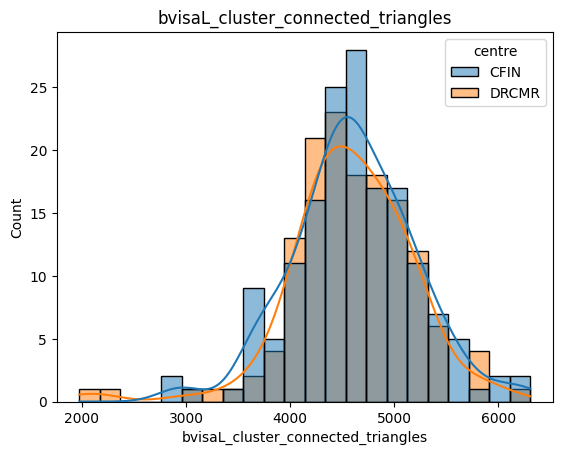

bvisaL_total_srf_area


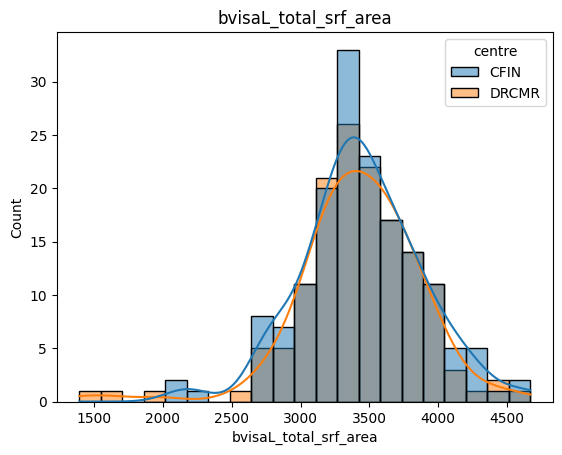

bvisaL_is_self_intersecting


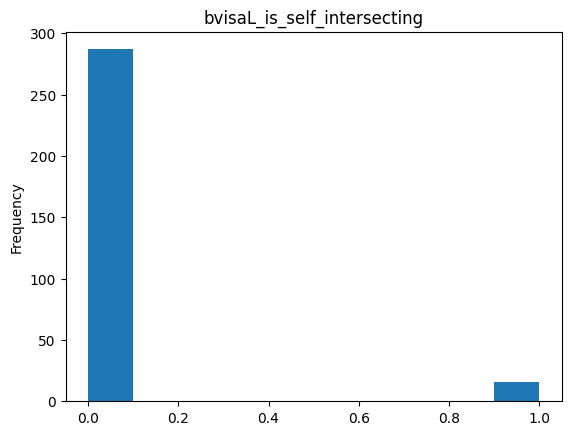

bvisaL_is_watertight


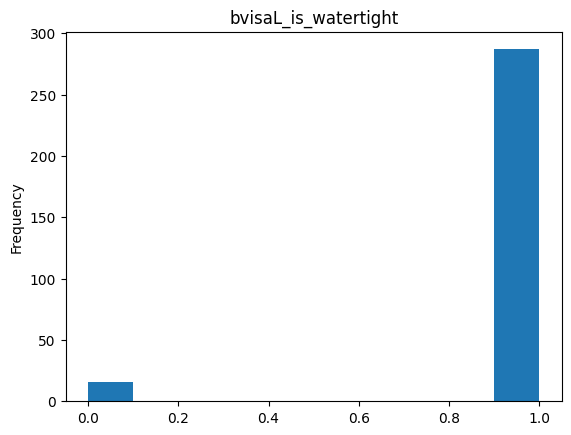

bvisaL_is_edge_manifold


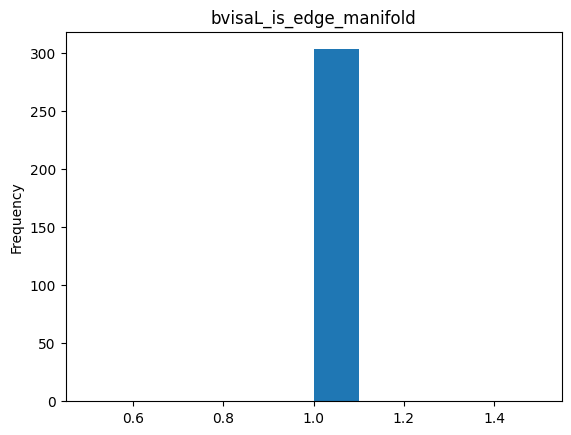

bvisaL_is_vertex_manifold


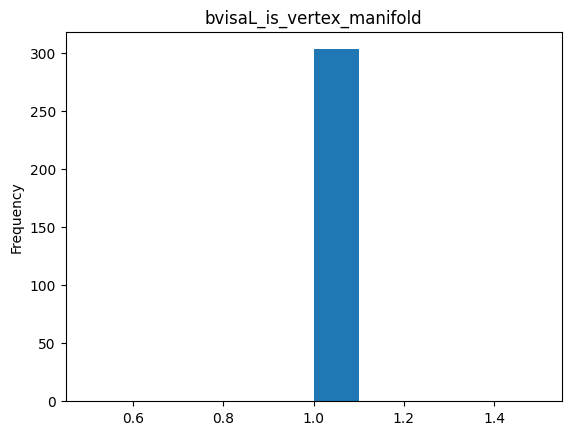

bvisaL_total_volume


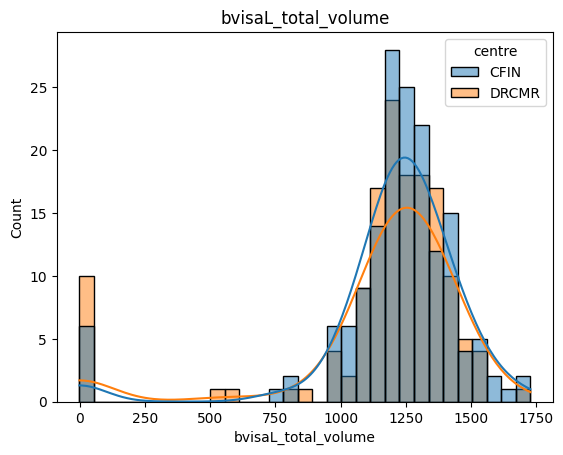

bvisaL_holes_filled_volume


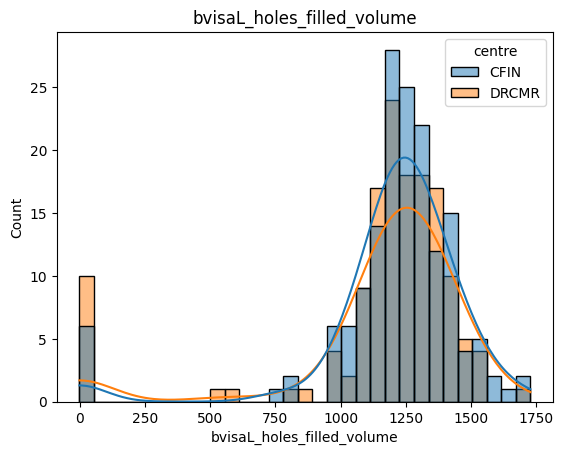

bvisaR_cluster_connected_triangles


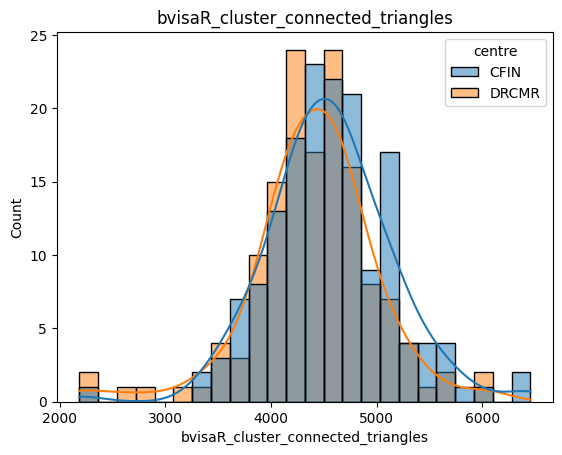

bvisaR_total_srf_area


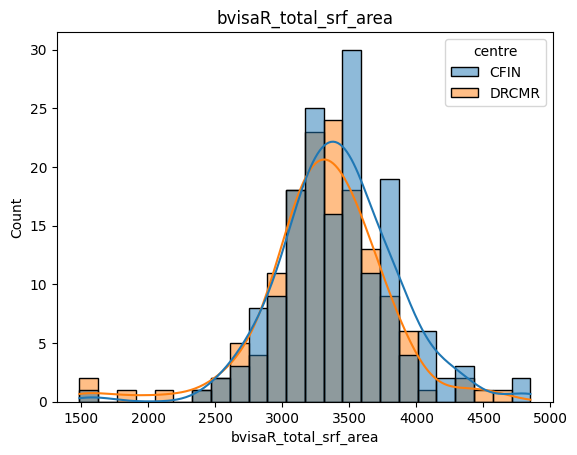

bvisaR_is_self_intersecting


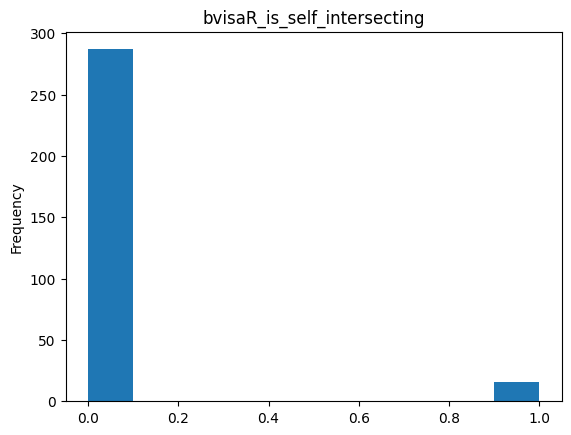

bvisaR_is_watertight


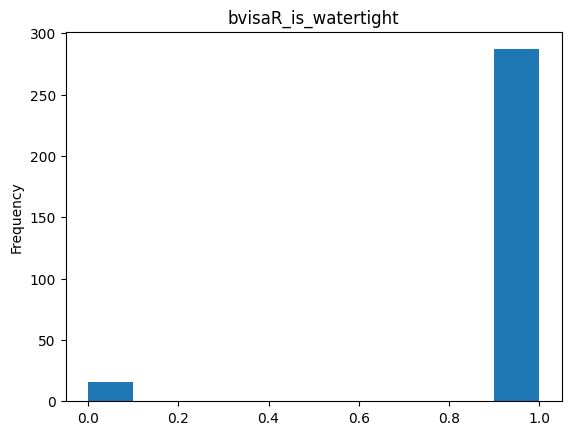

bvisaR_is_edge_manifold


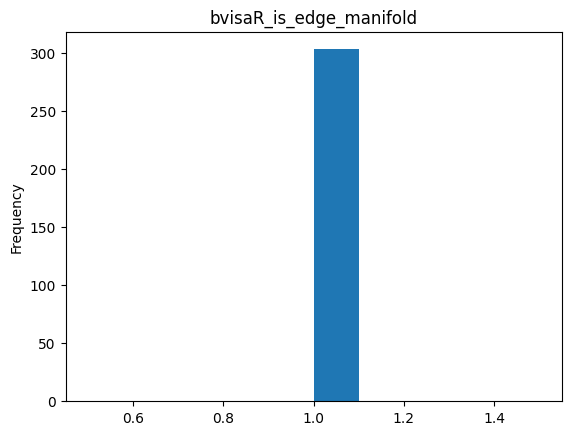

bvisaR_is_vertex_manifold


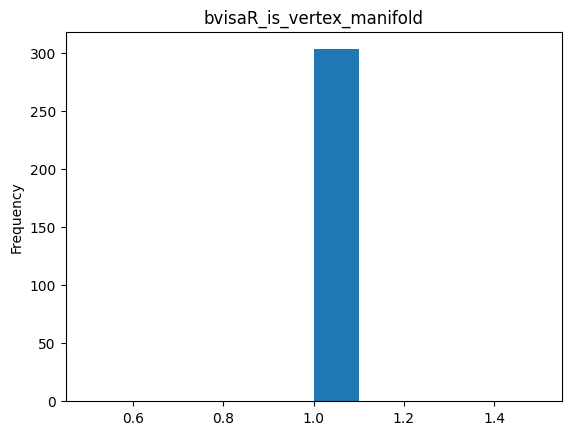

bvisaR_total_volume


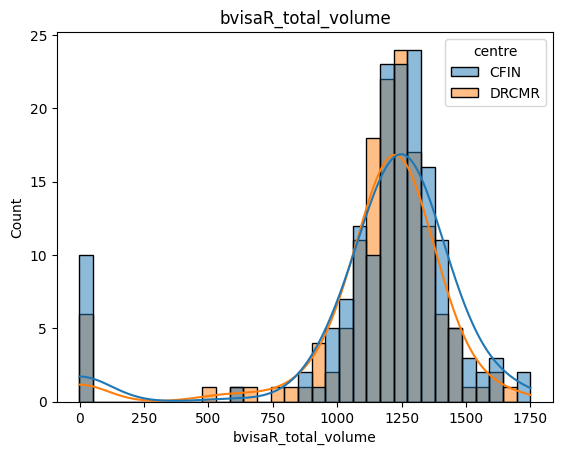

bvisaR_holes_filled_volume


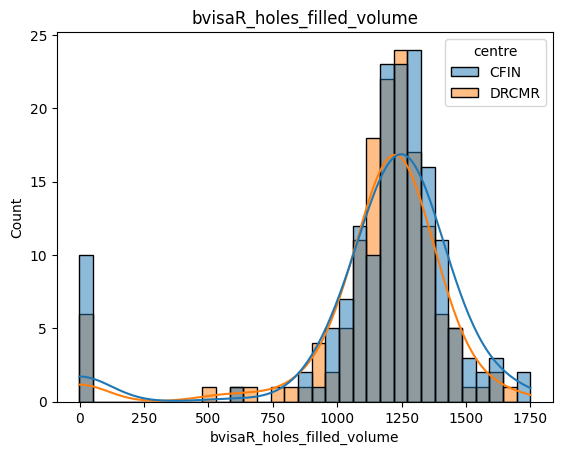

In [7]:
for c in mesh_df.columns:
    if mesh_df[c].dtype == np.int64 or mesh_df[c].dtype == np.float64:
        print(c)
        sns.histplot(mesh_df, x=c, hue='centre', kde=True, fill=True, common_norm=False)
        plt.title(c)
        plt.show()
    elif mesh_df[c].dtype == np.bool_:
        print(c)
        mesh_df[c].astype(np.int64).plot.hist()
        plt.title(c)
        plt.show()
        

## Mesh properties

### 1.1. Number of connected components

In [21]:
sum([len(x)!=1 for x in mesh_df.bvisaR_triangl_per_clust])

0

### 1.2. Number of triangles per connected component

In [86]:
dataset = CS_Images(segmentation='brainvisa',
                        mesh=True,
                        preload=False)

lbig = mesh_df.bvisaL_cluster_connected_triangles>6000
lsmall = mesh_df.bvisaL_cluster_connected_triangles<3000
rbig = mesh_df.bvisaR_cluster_connected_triangles>6000
rsmall = mesh_df.bvisaR_cluster_connected_triangles<3000

mask_cc_triangles = lsmall | rsmall | lbig | rbig
mesh_df[mask_cc_triangles]

Found 308 subjects and 308 MPRAGE images
Found 303 BrainVisa segmentations from 308 subjects


,caseid,centre,bvisaL_cluster_connected_triangles,bvisaL_triangl_per_clust,bvisaL_srf_are_per_clust,bvisaL_total_srf_area,bvisaL_is_self_intersecting,bvisaL_is_watertight,bvisaL_is_edge_manifold,bvisaL_is_vertex_manifold,...,bvisaR_srf_are_per_clust,bvisaR_total_srf_area,bvisaR_is_self_intersecting,bvisaR_is_watertight,bvisaR_is_edge_manifold,bvisaR_is_vertex_manifold,bvisaR_total_volume,bvisaR_holes_filled_volume,LCS_lebel2inters,RCS_lebel2inters
14,sub-via466,CFIN,6096,[6096],[4353.977824081762],4353.977824,False,True,True,True,...,[4850.795472487135],4850.795472,False,True,True,True,1711.550196,1711.550196,"{2: 12, 3: 781, 24: 1259, 165: 334, 258: 10}","{24: 1518, 41: 9, 42: 891, 165: 128}"
47,sub-via126,CFIN,6192,[6192],[4650.713612799021],4650.713613,False,True,True,True,...,[4232.959520048355],4232.959520,False,True,True,True,1584.096655,1584.096655,"{3: 551, 24: 1772, 165: 186, 258: 10}","{24: 1659, 42: 453, 165: 168, 258: 2}"
76,sub-via311,CFIN,2938,[2938],[2173.3447077196347],2173.344708,False,True,True,True,...,[3275.2555780741154],3275.255578,True,False,True,True,-1.000000,-1.000000,"{2: 14, 3: 764, 24: 714, 165: 146, 258: 43}","{24: 1152, 41: 2, 42: 1021, 165: 534, 258: 379}"
84,sub-via207,CFIN,6310,[6310],[4670.398386330134],4670.398386,False,True,True,True,...,[4748.255493521396],4748.255494,False,True,True,True,1749.846915,1749.846915,"{2: 16, 3: 1087, 24: 1198, 165: 184}","{24: 1431, 42: 934, 165: 261}"
99,sub-via331,CFIN,2930,[2930],[2142.2131698128046],2142.213170,False,True,True,True,...,[2885.3555014296926],2885.355501,False,True,True,True,1061.517178,1061.517178,"{3: 326, 24: 755, 165: 44}","{24: 1133, 42: 353, 165: 89, 258: 6}"
102,sub-via494,CFIN,4442,[4442],[3313.951123720027],3313.951124,False,True,True,True,...,[1582.9175363738857],1582.917536,False,True,True,True,593.265758,593.265758,"{3: 429, 24: 1232, 165: 70, 258: 7}","{24: 764, 42: 135, 165: 4}"
184,sub-via508,DRCMR,2214,[2214],[1630.4240792297712],1630.424079,False,True,True,True,...,[3302.6565606212257],3302.656561,False,True,True,True,1230.951784,1230.951784,"{3: 643, 24: 1167, 165: 96}","{24: 991, 42: 901, 165: 135, 258: 3}"
198,sub-via068,DRCMR,5864,[5864],[4454.875644402844],4454.875644,True,False,True,True,...,[4603.400944570403],4603.400945,False,True,True,True,1696.689146,1696.689146,"{3: 1112, 24: 1248, 77: 1, 165: 20}","{24: 1416, 42: 1004, 165: 86, 258: 2}"
211,sub-via191,DRCMR,1976,[1976],[1393.4204922562444],1393.420492,False,True,True,True,...,[1834.3322210706378],1834.332221,False,True,True,True,687.956835,687.956835,"{2: 10, 3: 1155, 24: 555, 165: 24, 258: 19}","{24: 630, 41: 18, 42: 882, 165: 67, 258: 9}"
214,sub-via061,DRCMR,5214,[5214],[3744.289369873697],3744.289370,True,False,True,True,...,[1579.4111069898534],1579.411107,False,True,True,True,583.618785,583.618785,"{3: 607, 24: 1361, 165: 360, 258: 104}","{24: 903, 41: 1, 42: 564, 165: 154, 258: 21}"


In [71]:
mesh_df.iloc[76]

caseid                                                                     sub-via311
centre                                                                           CFIN
bvisaL_cluster_connected_triangles                                               2938
bvisaL_triangl_per_clust                                                       [2938]
bvisaL_srf_are_per_clust                                         [2173.3447077196347]
bvisaL_total_srf_area                                                     2173.344708
bvisaL_is_self_intersecting                                                     False
bvisaL_is_watertight                                                             True
bvisaL_is_edge_manifold                                                          True
bvisaL_is_vertex_manifold                                                        True
bvisaL_total_volume                                                        781.473461
bvisaL_holes_filled_volume                            

In [87]:
plot_sulci_mesh('sub-via207', 'l')

### 1.3. Surface area of sulci

In [99]:
lbig = mesh_df.bvisaL_total_srf_area>4500
lsmall = mesh_df.bvisaL_total_srf_area<2500
rbig = mesh_df.bvisaR_total_srf_area>4500
rsmall = mesh_df.bvisaR_total_srf_area<2500

mask_srf_area = lsmall | rsmall | lbig | rbig
mesh_df[mask_srf_area]

,caseid,centre,bvisaL_cluster_connected_triangles,bvisaL_triangl_per_clust,bvisaL_srf_are_per_clust,bvisaL_total_srf_area,bvisaL_is_self_intersecting,bvisaL_is_watertight,bvisaL_is_edge_manifold,bvisaL_is_vertex_manifold,...,bvisaR_srf_are_per_clust,bvisaR_total_srf_area,bvisaR_is_self_intersecting,bvisaR_is_watertight,bvisaR_is_edge_manifold,bvisaR_is_vertex_manifold,bvisaR_total_volume,bvisaR_holes_filled_volume,LCS_lebel2inters,RCS_lebel2inters
76,sub-via311,CFIN,2938,[2938],[2173.3447077196347],2173.344708,False,True,True,True,...,[3275.2555780741154],3275.255578,True,False,True,True,-1.000000,-1.000000,"{2: 14, 3: 764, 24: 714, 165: 146, 258: 43}","{24: 1152, 41: 2, 42: 1021, 165: 534, 258: 379}"
99,sub-via331,CFIN,2930,[2930],[2142.2131698128046],2142.213170,False,True,True,True,...,[2885.3555014296926],2885.355501,False,True,True,True,1061.517178,1061.517178,"{3: 326, 24: 755, 165: 44}","{24: 1133, 42: 353, 165: 89, 258: 6}"
120,sub-via014,CFIN,3004,[3004],[2217.6950483192722],2217.695048,False,True,True,True,...,[2744.329671324687],2744.329671,False,True,True,True,986.843069,986.843069,"{3: 591, 24: 1660, 165: 118}","{24: 1093, 42: 650, 165: 82}"
184,sub-via508,DRCMR,2214,[2214],[1630.4240792297712],1630.424079,False,True,True,True,...,[3302.6565606212257],3302.656561,False,True,True,True,1230.951784,1230.951784,"{3: 643, 24: 1167, 165: 96}","{24: 991, 42: 901, 165: 135, 258: 3}"
211,sub-via191,DRCMR,1976,[1976],[1393.4204922562444],1393.420492,False,True,True,True,...,[1834.3322210706378],1834.332221,False,True,True,True,687.956835,687.956835,"{2: 10, 3: 1155, 24: 555, 165: 24, 258: 19}","{24: 630, 41: 18, 42: 882, 165: 67, 258: 9}"
260,sub-via135,DRCMR,2972,[2972],[1988.3762517375596],1988.376252,False,True,True,True,...,[1485.2722690396472],1485.272269,False,True,True,True,529.203193,529.203193,"{2: 11, 3: 995, 24: 910, 165: 15}","{24: 1297, 41: 6, 42: 818, 77: 1, 165: 37, 258..."


In [96]:
plot_sulci_mesh('sub-via311', 'r')

### 1.4. Total volume of sulci

In [104]:
lbig = mesh_df.bvisaL_total_volume>1600
lsmall = mesh_df.bvisaL_total_volume<750
rbig = mesh_df.bvisaR_total_volume>1600
rsmall = mesh_df.bvisaR_total_volume<750

mask_volume = lsmall | rsmall | lbig | rbig
mesh_df[mask_volume]

,caseid,centre,bvisaL_cluster_connected_triangles,bvisaL_triangl_per_clust,bvisaL_srf_are_per_clust,bvisaL_total_srf_area,bvisaL_is_self_intersecting,bvisaL_is_watertight,bvisaL_is_edge_manifold,bvisaL_is_vertex_manifold,...,bvisaR_srf_are_per_clust,bvisaR_total_srf_area,bvisaR_is_self_intersecting,bvisaR_is_watertight,bvisaR_is_edge_manifold,bvisaR_is_vertex_manifold,bvisaR_total_volume,bvisaR_holes_filled_volume,LCS_lebel2inters,RCS_lebel2inters
14,sub-via466,CFIN,6096,[6096],[4353.977824081762],4353.977824,False,True,True,True,...,[4850.795472487135],4850.795472,False,True,True,True,1711.550196,1711.550196,"{2: 12, 3: 781, 24: 1259, 165: 334, 258: 10}","{24: 1518, 41: 9, 42: 891, 165: 128}"
47,sub-via126,CFIN,6192,[6192],[4650.713612799021],4650.713613,False,True,True,True,...,[4232.959520048355],4232.959520,False,True,True,True,1584.096655,1584.096655,"{3: 551, 24: 1772, 165: 186, 258: 10}","{24: 1659, 42: 453, 165: 168, 258: 2}"
84,sub-via207,CFIN,6310,[6310],[4670.398386330134],4670.398386,False,True,True,True,...,[4748.255493521396],4748.255494,False,True,True,True,1749.846915,1749.846915,"{2: 16, 3: 1087, 24: 1198, 165: 184}","{24: 1431, 42: 934, 165: 261}"
122,sub-via396,CFIN,5964,[5964],[4475.027158267183],4475.027158,False,True,True,True,...,[4319.800408273138],4319.800408,False,True,True,True,1608.414159,1608.414159,"{3: 812, 24: 1242, 165: 241, 258: 71}","{24: 1398, 42: 744, 165: 175, 258: 20}"
247,sub-via172,DRCMR,6164,[6164],[4652.516957646883],4652.516958,False,True,True,True,...,[4504.458177164568],4504.458177,False,True,True,True,1634.072290,1634.072290,"{2: 3, 3: 969, 24: 1448, 165: 35}","{24: 1355, 42: 998, 165: 38, 258: 17}"


In [106]:
plot_sulci_mesh('sub-via396', 'l')

In [105]:
mesh_df.iloc[122]

caseid                                                            sub-via396
centre                                                                  CFIN
bvisaL_cluster_connected_triangles                                      5964
bvisaL_triangl_per_clust                                              [5964]
bvisaL_srf_are_per_clust                                 [4475.027158267183]
bvisaL_total_srf_area                                            4475.027158
bvisaL_is_self_intersecting                                            False
bvisaL_is_watertight                                                    True
bvisaL_is_edge_manifold                                                 True
bvisaL_is_vertex_manifold                                               True
bvisaL_total_volume                                              1616.465385
bvisaL_holes_filled_volume                                       1616.465385
bvisaR_cluster_connected_triangles                                      5694

### 1.5. Self-intersections and not watertight meshes

In [114]:
lsint = mesh_df.bvisaL_is_self_intersecting
lwat = mesh_df.bvisaL_is_watertight
rsint = mesh_df.bvisaR_is_self_intersecting
rwat = mesh_df.bvisaR_is_watertight


bad_mesh_mask = lsint | ~lwat | rsint | ~rwat
mesh_df[~lwat]

,caseid,centre,bvisaL_cluster_connected_triangles,bvisaL_triangl_per_clust,bvisaL_srf_are_per_clust,bvisaL_total_srf_area,bvisaL_is_self_intersecting,bvisaL_is_watertight,bvisaL_is_edge_manifold,bvisaL_is_vertex_manifold,...,bvisaR_srf_are_per_clust,bvisaR_total_srf_area,bvisaR_is_self_intersecting,bvisaR_is_watertight,bvisaR_is_edge_manifold,bvisaR_is_vertex_manifold,bvisaR_total_volume,bvisaR_holes_filled_volume,LCS_lebel2inters,RCS_lebel2inters
9,sub-via310,CFIN,5372,[5372],[4029.580404583083],4029.580405,True,False,True,True,...,[3910.497027351894],3910.497027,True,False,True,True,-1.000000,-1.000000,"{3: 713, 24: 1265, 165: 169, 258: 5}","{24: 1251, 42: 668, 165: 149, 258: 7}"
72,sub-via275,CFIN,5052,[5052],[3815.1451036845106],3815.145104,True,False,True,True,...,[3677.0697899049137],3677.069790,False,True,True,True,1341.771545,1341.771545,"{3: 879, 24: 1020, 165: 94}","{24: 876, 41: 7, 42: 1019, 165: 68}"
81,sub-via467,CFIN,5232,[5232],[3904.440259527737],3904.440260,True,False,True,True,...,[3534.378589721508],3534.378590,False,True,True,True,1235.264606,1235.264606,"{3: 880, 24: 1121, 165: 125, 258: 27}","{24: 1186, 42: 519, 165: 101, 258: 20}"
87,sub-via273,CFIN,3770,[3770],[2822.653362176503],2822.653362,True,False,True,True,...,[3043.2081291773234],3043.208129,False,True,True,True,1098.922480,1098.922480,"{2: 3, 3: 800, 24: 694, 165: 28}","{24: 858, 42: 705, 165: 57}"
103,sub-via511,CFIN,3794,[3794],[2735.090933534641],2735.090934,True,False,True,True,...,[2633.984248108116],2633.984248,False,True,True,True,970.623357,970.623357,"{2: 1, 3: 553, 24: 801, 165: 131, 258: 1}","{24: 1070, 42: 348, 165: 31, 258: 2}"
124,sub-via519,CFIN,4664,[4664],[3384.465277254963],3384.465277,True,False,True,True,...,[3180.648009779288],3180.648010,False,True,True,True,1141.217678,1141.217678,"{3: 469, 24: 1352, 165: 24}","{24: 1256, 42: 394, 165: 24}"
163,sub-via448,DRCMR,4046,[4046],[2917.15827016835],2917.158270,True,False,True,True,...,[2493.9998558167317],2493.999856,False,True,True,True,898.223074,898.223074,"{0: 2, 2: 3, 3: 332, 24: 1163, 165: 58}","{0: 1, 24: 1030, 42: 252, 165: 36}"
165,sub-via449,DRCMR,4300,[4300],[3246.6303503002955],3246.630350,True,False,True,True,...,[3690.7268521692226],3690.726852,False,True,True,True,1321.342258,1321.342258,"{2: 9, 3: 781, 24: 925, 165: 44}","{24: 738, 41: 9, 42: 1119, 165: 82}"
180,sub-via408,DRCMR,5026,[5026],[3775.498614654507],3775.498615,True,False,True,True,...,[3483.2668943371664],3483.266894,False,True,True,True,1262.115961,1262.115961,"{3: 641, 24: 1210, 165: 113, 258: 11}","{24: 1283, 42: 485, 165: 75, 258: 2}"
198,sub-via068,DRCMR,5864,[5864],[4454.875644402844],4454.875644,True,False,True,True,...,[4603.400944570403],4603.400945,False,True,True,True,1696.689146,1696.689146,"{3: 1112, 24: 1248, 77: 1, 165: 20}","{24: 1416, 42: 1004, 165: 86, 258: 2}"


In [115]:
plot_sulci_mesh('sub-via519', 'l')

## Segmentation properties

In [140]:
from utils.fs_mapping import fs_lut

In [149]:
fs_lut_names, _ = fs_lut()
fs_lut_names[165] = 'NaN'
fs_lut_names[258] = 'NaN'

linters = []
rinters = []
for i, r in mesh_df.iterrows():
    linters.append({fs_lut_names[k]:v/sum(r['LCS_lebel2inters'].values()) for k,v in r['LCS_lebel2inters'].items()})
    rinters.append({fs_lut_names[k]:v/sum(r['RCS_lebel2inters'].values()) for k,v in r['RCS_lebel2inters'].items()})

In [167]:
mesh_df['CSF intersection Left Sulci'] = [x['CSF'] for x in linters]
mesh_df['CSF intersection Right Sulci'] = [x['CSF'] for x in rinters]

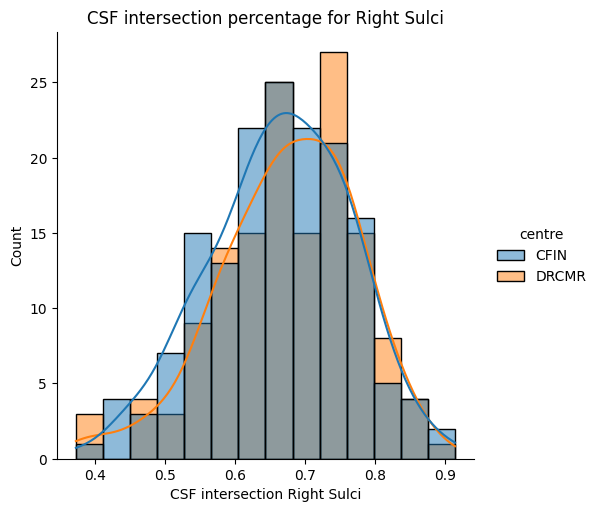

In [168]:
sns.displot(mesh_df, x='CSF intersection Right Sulci', hue='centre', kde=True, fill=True, common_norm=False)
plt.title('CSF intersection percentage for Right Sulci')

plt.show()

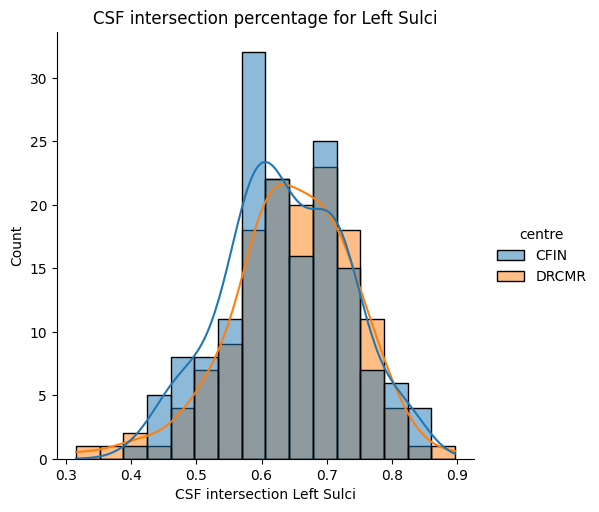

In [169]:
sns.displot(mesh_df, x='CSF intersection Left Sulci', hue='centre', kde=True, fill=True, common_norm=False)
plt.title('CSF intersection percentage for Left Sulci')
plt.show()

### 2.1. CS intersection

In [184]:
lcs_csf = mesh_df['CSF intersection Left Sulci'] < 0.4
rcs_csf = mesh_df['CSF intersection Right Sulci'] < 0.4
intersection_mask = lcs_csf | rcs_csf
mesh_df[intersection_mask]

,caseid,centre,bvisaL_cluster_connected_triangles,bvisaL_triangl_per_clust,bvisaL_srf_are_per_clust,bvisaL_total_srf_area,bvisaL_is_self_intersecting,bvisaL_is_watertight,bvisaL_is_edge_manifold,bvisaL_is_vertex_manifold,...,bvisaR_is_edge_manifold,bvisaR_is_vertex_manifold,bvisaR_total_volume,bvisaR_holes_filled_volume,LCS_lebel2inters,RCS_lebel2inters,CSF_intersection_LeftSulci,CSF_intersection Left Sulci,CSF intersection Right Sulci,CSF intersection Left Sulci
76,sub-via311,CFIN,2938,[2938],[2173.3447077196347],2173.344708,False,True,True,True,...,True,True,-1.000000,-1.000000,"{2: 14, 3: 764, 24: 714, 165: 146, 258: 43}","{24: 1152, 41: 2, 42: 1021, 165: 534, 258: 379}",0.424747,0.424747,0.373057,0.424747
165,sub-via449,DRCMR,4300,[4300],[3246.6303503002955],3246.630350,True,False,True,True,...,True,True,1321.342258,1321.342258,"{2: 9, 3: 781, 24: 925, 165: 44}","{24: 738, 41: 9, 42: 1119, 165: 82}",0.525867,0.525867,0.378850,0.525867
211,sub-via191,DRCMR,1976,[1976],[1393.4204922562444],1393.420492,False,True,True,True,...,True,True,687.956835,687.956835,"{2: 10, 3: 1155, 24: 555, 165: 24, 258: 19}","{24: 630, 41: 18, 42: 882, 165: 67, 258: 9}",0.314804,0.314804,0.392279,0.314804
263,sub-via277,DRCMR,4382,[4382],[3382.8908485237694],3382.890849,False,True,True,True,...,True,True,1299.168274,1299.168274,"{3: 1069, 24: 666, 165: 17, 258: 1}","{24: 1112, 42: 737, 165: 33}",0.379920,0.379920,0.590861,0.379920


In [173]:
plot_sulci_mesh('sub-via059', 'l')

In [192]:
segm = nb.load('/mnt/projects/VIA_Vlad/nobackup/MP2RAGE_FS7_2_0_samseg/via059/mri/samseg/seg.mgz')
# segm = segm.get_fdata()

segmnifti = nb.Nifti1Image(segm.get_fdata(), segm.affine, segm.header)

In [193]:
segmnifti.to_filename('seg_sub-via059.nii.gz')